In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, RocCurveDisplay, PrecisionRecallDisplay

In [2]:
# load processed dataset
data = np.load("../data/processed_data.npz", allow_pickle=True)
X_train, X_test = data["X_train"], data["X_test"]
y_train, y_test = data["y_train"], data["y_test"]
feature_names = data["feature_names"]

In [3]:
X_train

array([[ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.71426914, -1.01786452],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.80699872,  0.74138631],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.10576199,  1.05159879],
       ...,
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.88306211, -0.34189136],
       [ 0.        ,  1.        ,  1.        , ...,  0.        ,
        -1.17064949,  1.97294827],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.63820574,  1.48851435]], shape=(696, 30))

In [4]:
# train the model
classifier = GaussianNB(
    priors=None,
    var_smoothing=1e-9
)
classifier.fit(X_train, y_train)

,priors,None
,var_smoothing,1e-09


In [5]:
# predicting the test set
y_pred = classifier.predict(X_test)
print(y_pred, y_pred.shape, y_pred.dtype)


[0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0.] (174,) float64


In [6]:
# compare predicted values vs Actual values
print(np.concatenate((y_pred.reshape(-1,1), y_test.reshape(-1,1)),1))

[[0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [1. 1.]
 [1. 1.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [1. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 1.]
 [1. 1.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [1. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 1.]
 [0. 0.]
 [1. 1.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 

In [7]:
# predicting for one sample
one_sample = X_test[0]
y_hat_1 =classifier.predict([one_sample])[0]
print(y_hat_1)

0.0


In [8]:
# measure model performance
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)


print(f"Confusion Matrix: {cm}")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"f1_score: {f1:.3f}")

Confusion Matrix: [[91  9]
 [57 17]]
Accuracy: 0.621
Precision: 0.654
Recall: 0.230
f1_score: 0.340


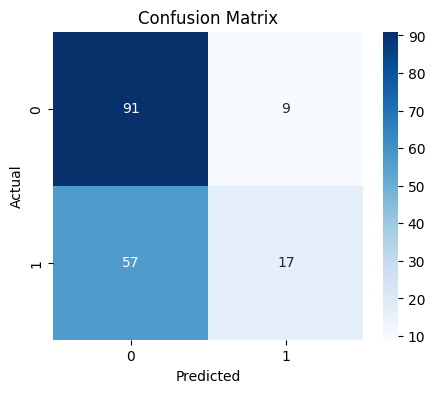

In [9]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

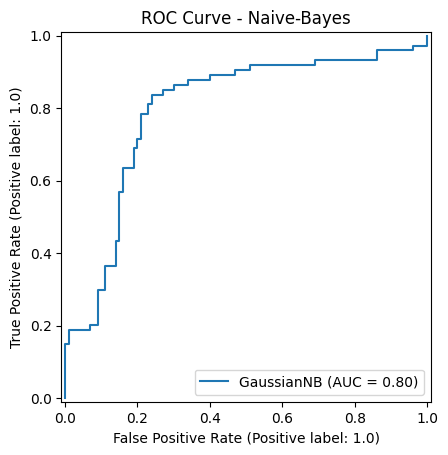

In [10]:
RocCurveDisplay.from_estimator(classifier, X_test, y_test)
plt.title("ROC Curve - Naive-Bayes")
plt.show()

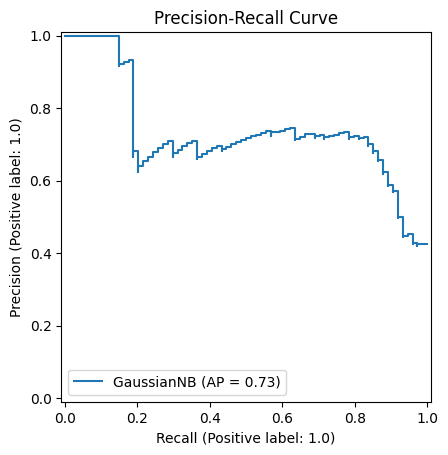

In [11]:
PrecisionRecallDisplay.from_estimator(classifier, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.show()
